# Python NLTK sentiment analysis

https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis/data

Github: https://github.com/nagypeterjob/Sentiment-Analysis-NLTK-ML-LSTM

Word cloud: https://github.com/amueller/word_cloud

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [4]:
data = pd.read_csv('dataset/twitter_sentiment/Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]
print(data)

                                                    text sentiment
0      RT @NancyLeeGrahn: How did everyone feel about...   Neutral
1      RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive
2      RT @TJMShow: No mention of Tamir Rice and the ...   Neutral
3      RT @RobGeorge: That Carly Fiorina is trending ...  Positive
4      RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive
5      RT @GregAbbott_TX: @TedCruz: "On my first day ...  Positive
6      RT @warriorwoman91: I liked her and was happy ...  Negative
7      Going on #MSNBC Live with @ThomasARoberts arou...   Neutral
8      Deer in the headlights RT @lizzwinstead: Ben C...  Negative
9      RT @NancyOsborne180: Last night's debate prove...  Negative
10     @JGreenDC @realDonaldTrump In all fairness #Bi...  Negative
11     RT @WayneDupreeShow: Just woke up to tweet thi...  Positive
12     Me reading my family's comments about how grea...  Negative
13     RT @ArcticFox2016: RT @AllenWestRepub "Dear @J...   Neu

In [5]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)

## Word cloud visualiztion

Positive words


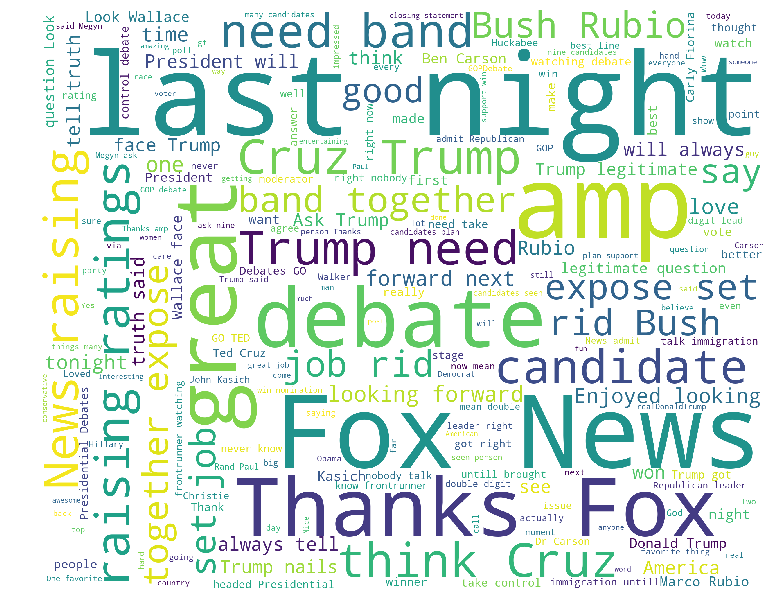

Negative words


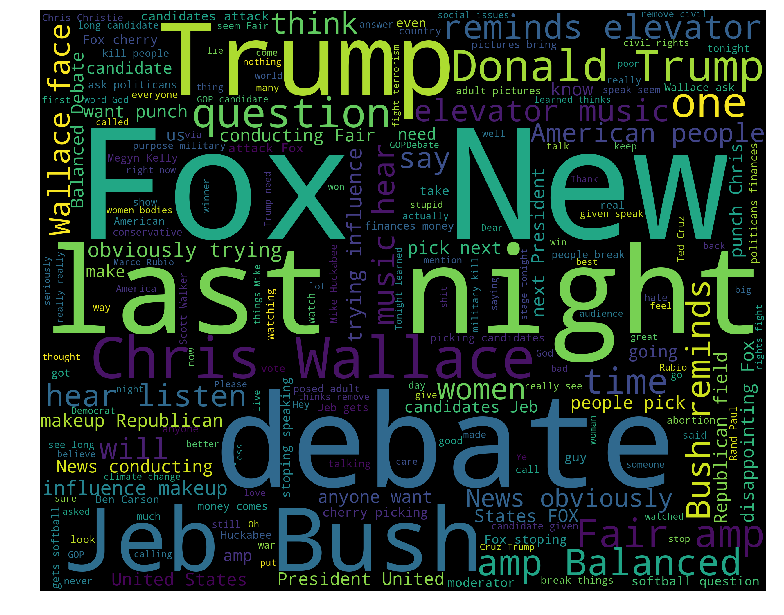

In [6]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [7]:
# After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']


# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

In [8]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

## Finally, with not-so-intelligent metrics, I tried to measure how the classifier algorithm scored.

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt)) 

# Applying to Image captions

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

from utils.scoring_utils import *
from utils.data_utils import *
from utils.plotting_utils import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Human generated captions

Total skipped images 0
Negative words


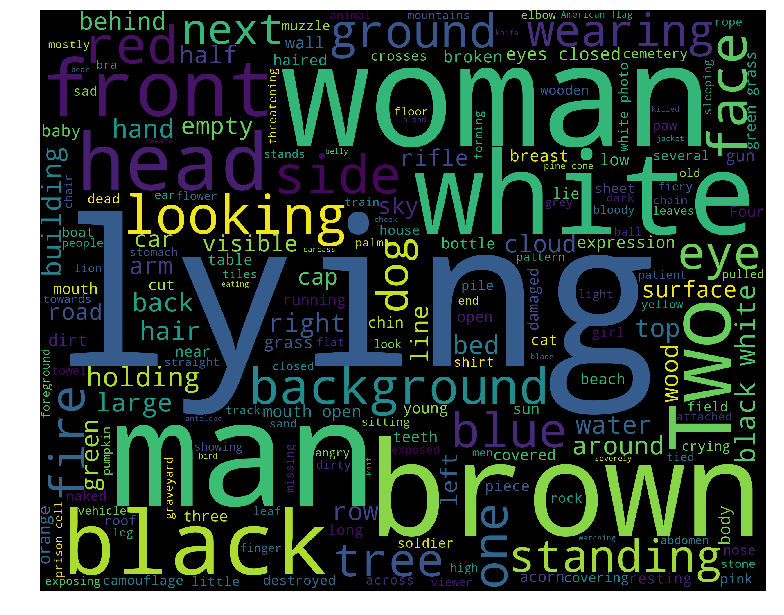

Positive words


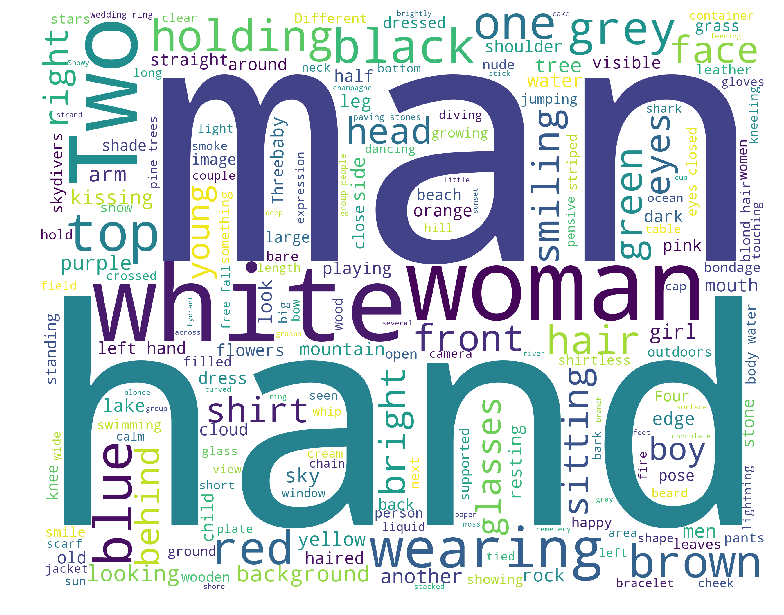

In [36]:
captions_csv_path = "dataset/metadata/captions.csv"
labelToCaptions = get_caption_to_label(captions_csv_path)

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    #print(cleaned_word)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
train_pos = labelToCaptions[1]
train_neg = labelToCaptions[-1]
train_neut = labelToCaptions[0]

neg_features = get_word_features(train_neg)
neut_features = get_word_features(train_neut)
pos_features = get_word_features(train_pos)


# Hereby I plotted the most frequently distributed words. 
print("Negative words")
wordcloud_draw(neg_features)
print("Positive words")
wordcloud_draw(pos_features,'white')    

## Auto Generated Captions

Total skipped images 0
Negative words


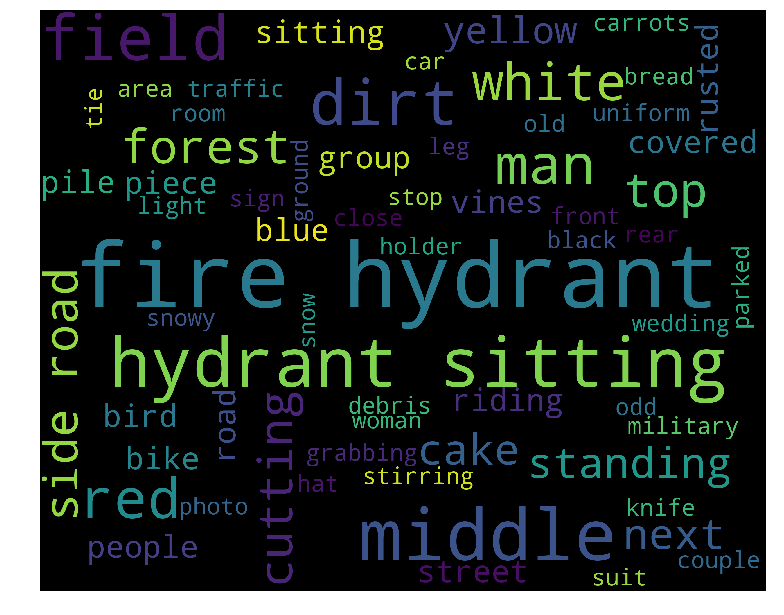

Positive words


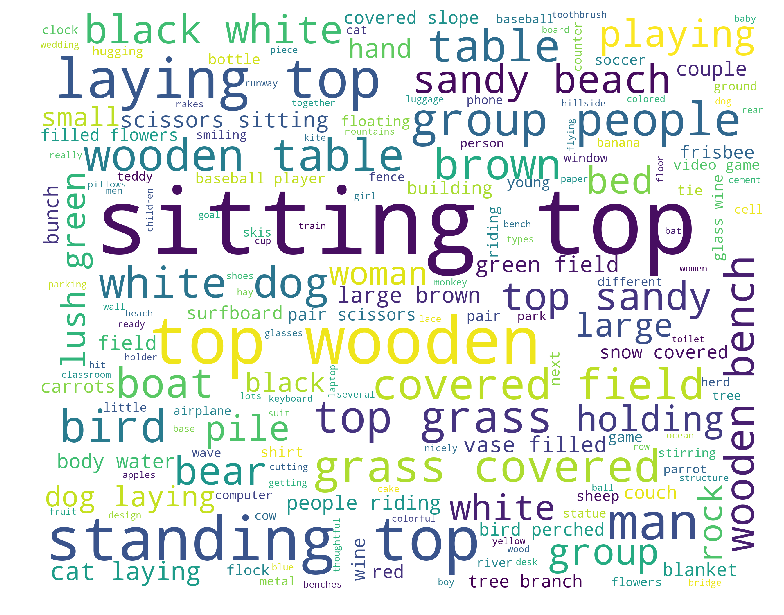

In [39]:
auto_generated_captions_path = "dataset/metadata/auto_generated_captions.csv"
delimeter = "|"
labelToCaptions = get_caption_to_label(auto_generated_captions_path,delimeter)

train_pos = labelToCaptions[1]
train_neg = labelToCaptions[-1]
train_neut = labelToCaptions[0]

neg_features = get_word_features(train_neg)
neut_features = get_word_features(train_neut)
pos_features = get_word_features(train_pos)


# Hereby I plotted the most frequently distributed words. 
print("Negative words")
wordcloud_draw(neg_features)
print("Positive words")
wordcloud_draw(pos_features,'white')